In [1]:
import matplotlib.pyplot as plt
from PIL import Image


def show_pil_image(i):
    i = np.resize((i/16 * 255),(8,8))
    im = Image.fromarray(i)
    if im.mode != 'L':
        im = im.convert('L')
    display(im)
    
def show_big_image(i):
    i = np.resize((i/16 * 255),(8,8))
    plt.gray()
    plt.matshow(i)
    plt.show()

### K-NN

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits() # 64 atributos - imagens 8 x 8 

ss = StandardScaler(with_std=False)
X = ss.fit_transform(digits['data'])

In [3]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(algorithm='ball_tree', n_neighbors=25, leaf_size=30)
knn.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=25)

In [4]:
import numpy as np

X_noise = X[50] + np.random.normal(0.0, 1.5, size=(64, ))

<Figure size 640x480 with 0 Axes>

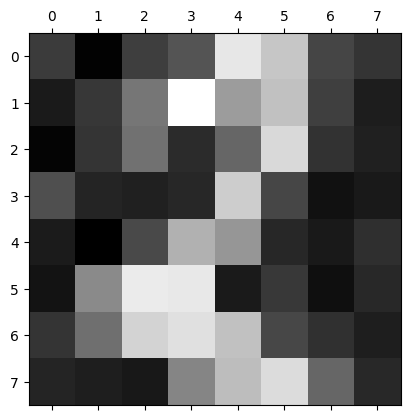

In [5]:
#show_big_image( ss.inverse_transform([X[520]])[0])
show_big_image( ss.inverse_transform([X_noise])[0])

In [6]:
distances, neighbors = knn.kneighbors(X_noise.reshape(1, -1), return_distance=True)

print(distances[0])

[10.08171512 19.04908425 23.81052565 25.73199632 26.18275566 29.37036671
 29.64906481 30.09804223 30.78139009 31.34753349 32.11397248 32.35338227
 32.74163674 33.20476439 33.56811293 33.56825529 33.73425378 34.54059053
 34.59512722 34.72074129 34.80293106 34.89330243 34.92250123 35.09188102
 35.47398901]


<Figure size 640x480 with 0 Axes>

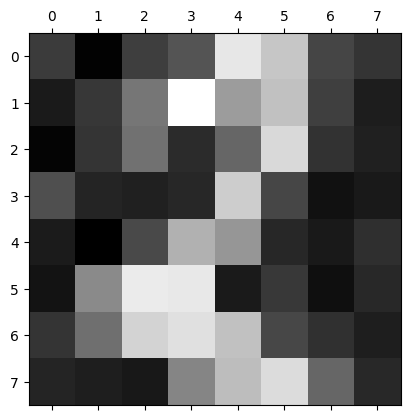

--------------------------
Distância: 10.081715121045459


<Figure size 640x480 with 0 Axes>

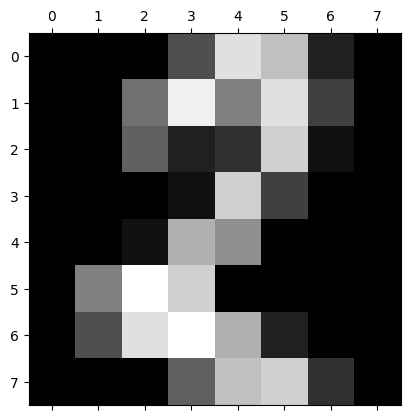

--------------------------
Distância: 19.04908424503967


<Figure size 640x480 with 0 Axes>

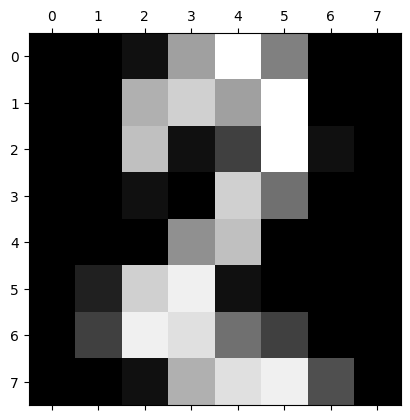

--------------------------
Distância: 23.81052565073035


<Figure size 640x480 with 0 Axes>

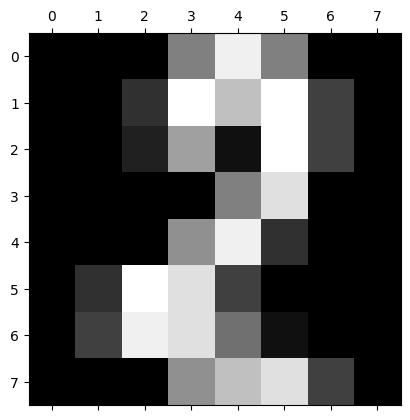

--------------------------
Distância: 25.731996321284765


<Figure size 640x480 with 0 Axes>

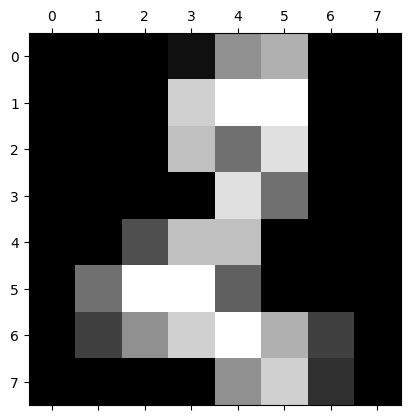

--------------------------
Distância: 26.18275566408392


<Figure size 640x480 with 0 Axes>

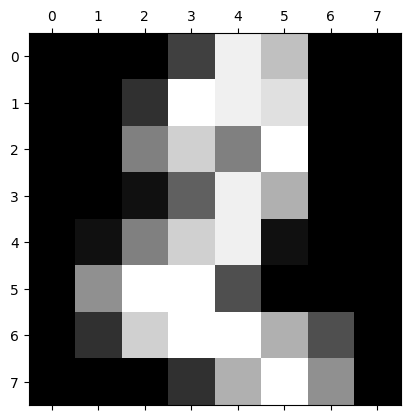

--------------------------
Distância: 29.370366714079747


<Figure size 640x480 with 0 Axes>

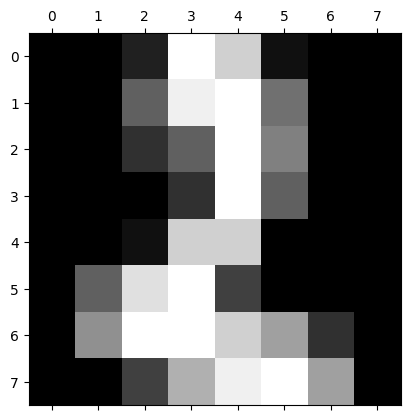

--------------------------
Distância: 29.64906481434352


<Figure size 640x480 with 0 Axes>

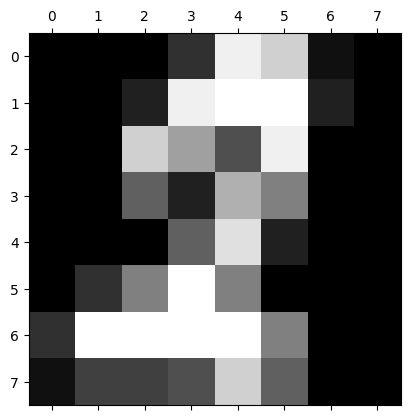

--------------------------
Distância: 30.09804223037812


<Figure size 640x480 with 0 Axes>

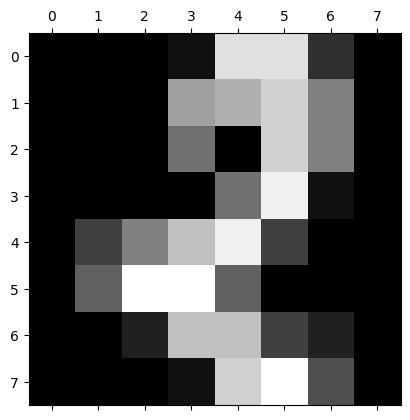

--------------------------
Distância: 30.781390090417286


<Figure size 640x480 with 0 Axes>

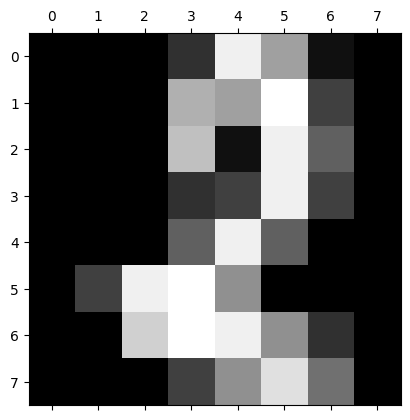

--------------------------
Distância: 31.34753348893965


<Figure size 640x480 with 0 Axes>

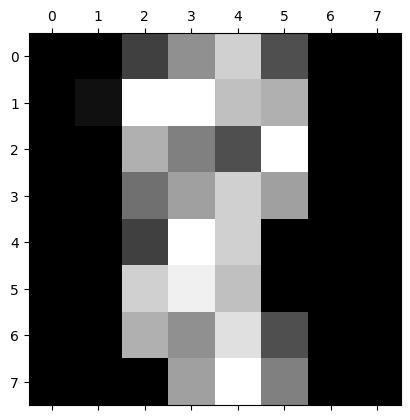

--------------------------
Distância: 32.11397248215257


<Figure size 640x480 with 0 Axes>

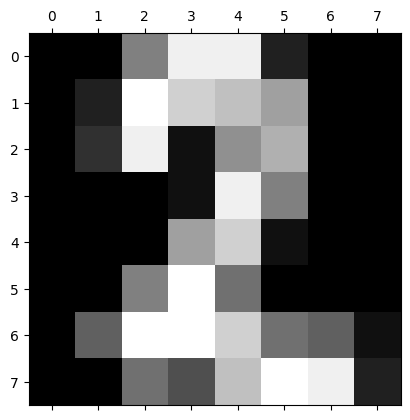

--------------------------
Distância: 32.35338227373079


<Figure size 640x480 with 0 Axes>

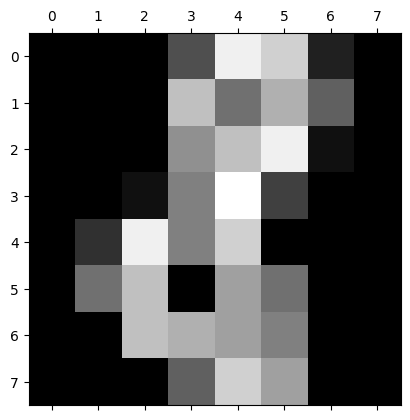

--------------------------
Distância: 32.74163674499857


<Figure size 640x480 with 0 Axes>

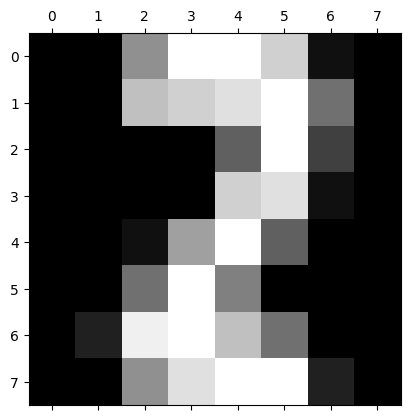

--------------------------
Distância: 33.204764387228785


<Figure size 640x480 with 0 Axes>

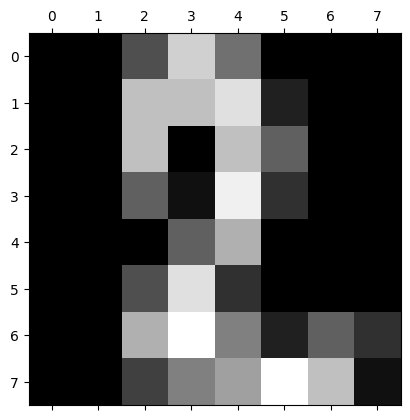

--------------------------
Distância: 33.56811293109133


<Figure size 640x480 with 0 Axes>

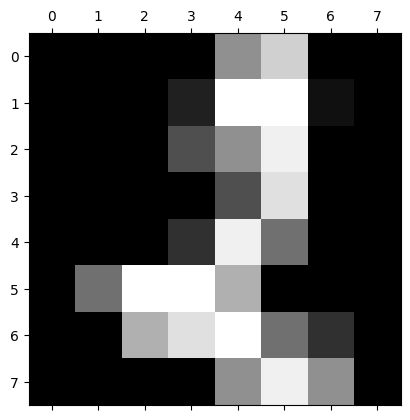

--------------------------
Distância: 33.56825529375305


<Figure size 640x480 with 0 Axes>

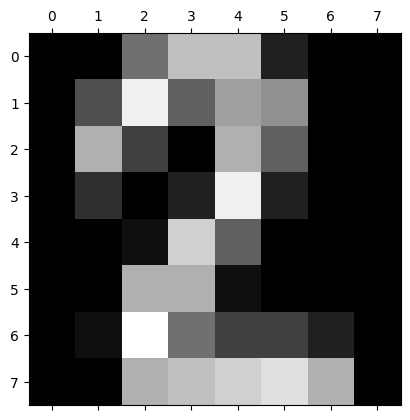

--------------------------
Distância: 33.734253778429505


<Figure size 640x480 with 0 Axes>

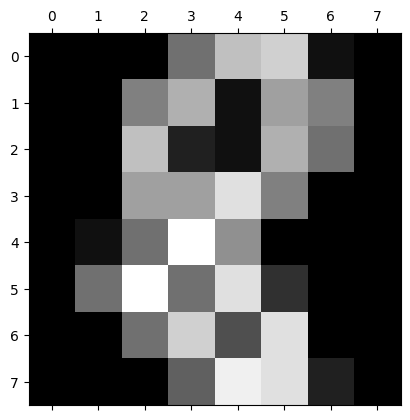

--------------------------
Distância: 34.54059053415554


<Figure size 640x480 with 0 Axes>

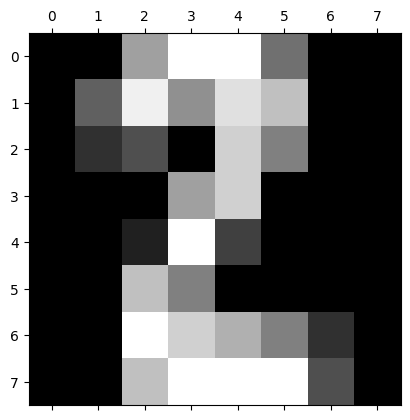

--------------------------
Distância: 34.59512722059294


<Figure size 640x480 with 0 Axes>

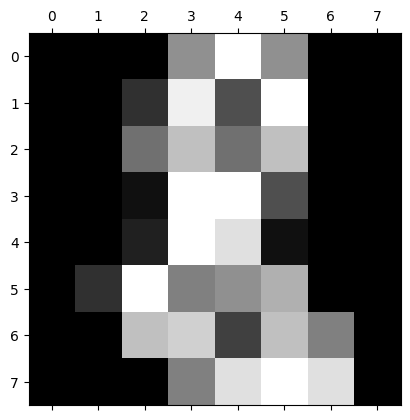

--------------------------
Distância: 34.72074128826151


<Figure size 640x480 with 0 Axes>

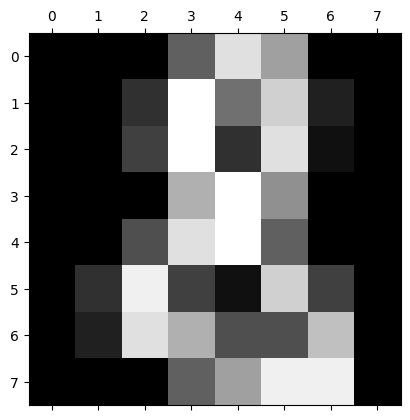

--------------------------
Distância: 34.80293106105217


<Figure size 640x480 with 0 Axes>

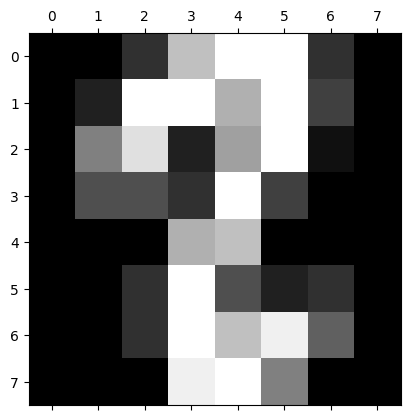

--------------------------
Distância: 34.893302431839096


<Figure size 640x480 with 0 Axes>

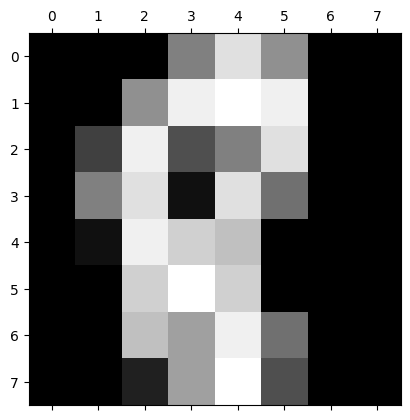

--------------------------
Distância: 34.92250123383574


<Figure size 640x480 with 0 Axes>

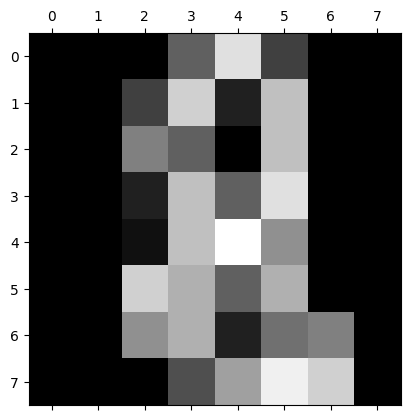

--------------------------
Distância: 35.091881018673725


<Figure size 640x480 with 0 Axes>

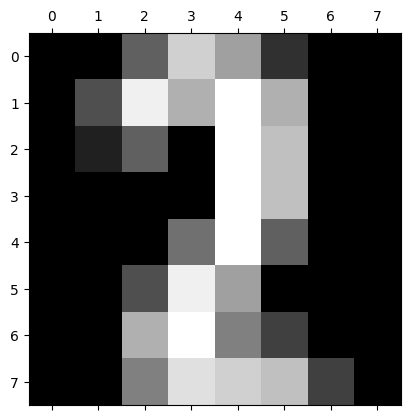

--------------------------
Distância: 35.47398901023048


<Figure size 640x480 with 0 Axes>

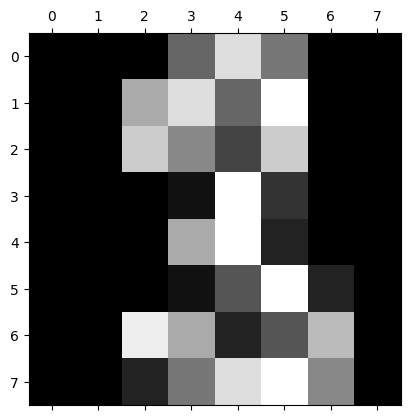

In [7]:
noise_img = ss.inverse_transform([X_noise])[0]
show_big_image(noise_img)

#dig_img = ss.inverse_transform([[X[neighbors[0][0]]][0]])[0]
#show_big_image(dig_img)

for i in range(len(neighbors[0])):
    dig_img = ss.inverse_transform([[X[neighbors[0][i]]][0]])[0]
    print("--------------------------")
    print("Distância:", distances[0][i])
    show_big_image(dig_img)

In [8]:
neighbors[0]

array([  50,  116,  115,   57,    2,  113,  502,   54,   51,  114, 1041,
        524,  860, 1547,   75,  369,  630,  340,  556,  592,  700,  804,
        569,  152,  605], dtype=int64)

### Gaussian mixture

In [67]:
from sklearn.datasets import make_blobs

nb_samples = 800

X, Y = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1, random_state=1000)

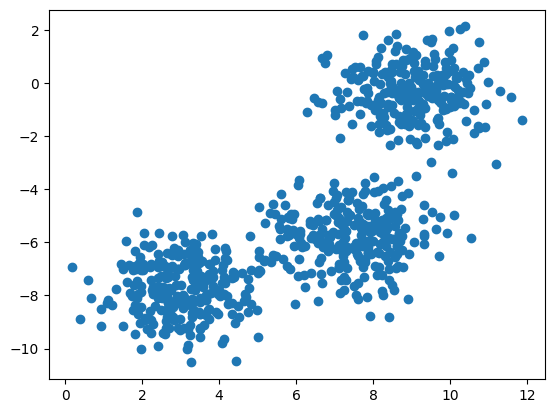

In [68]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],)
plt.show()

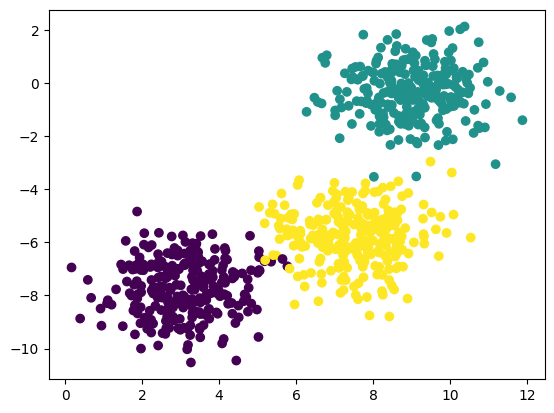

In [69]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [12]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, max_iter=1000, random_state=1000)
gm.fit(X)

GaussianMixture(max_iter=1000, n_components=3, random_state=1000)

In [13]:
print("Médias:")
print(gm.means_)

print("\nCovariancias:")
print(gm.covariances_)

print("\nPesos:")
print(gm.weights_)

Médias:
[[ 7.80111145 -6.00456487]
 [ 3.0206414  -7.42466728]
 [ 9.06106625 -0.37142513]]

Covariancias:
[[[4.20046102 0.49690762]
  [0.49690762 5.59271563]]

 [[4.19329648 0.48239197]
  [0.48239197 5.99331202]]

 [[4.79115349 0.11965435]
  [0.11965435 4.57299492]]]

Pesos:
[0.31109442 0.35361012 0.33529546]


In [14]:
import numpy as np

X_test_1 = np.array([10.0, -2.5])
print(gm.predict_proba(X_test_1.reshape(1, -1)))

X_test_2 = np.array([5.0, -6.0])
print(gm.predict_proba(X_test_2.reshape(1, -1)))

[[0.26230266 0.0009522  0.73674514]]
[[0.38662042 0.6064004  0.00697918]]


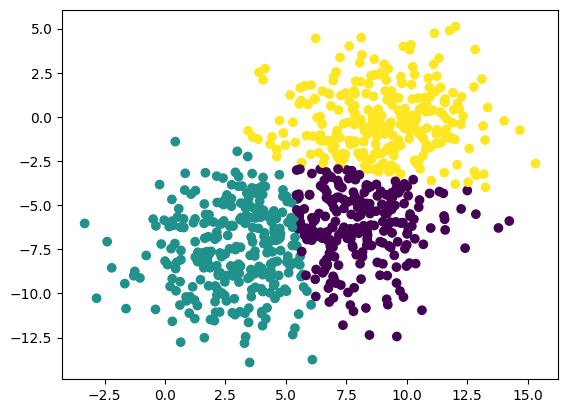

In [15]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=gm.predict(X))
plt.show()

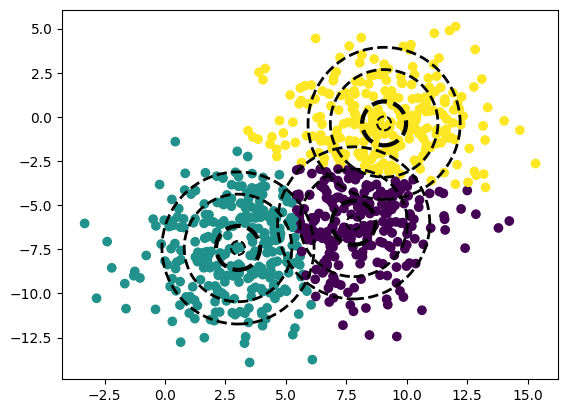

In [16]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=gm.predict(X))

plt.scatter(gm.means_[:, 0], gm.means_[:, 1], s=12000, facecolors='none', edgecolors='black', linestyle='--', linewidths=2)
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], s=6000, facecolors='none', edgecolors='black', linestyle='--', linewidths=2)
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], s=1000, facecolors='none', edgecolors='black', linestyle='--', linewidths=3)
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], s=100, facecolors='none', edgecolors='black', linestyle='--', linewidths=1.5)

plt.show()

In [17]:
import numpy as np

X_test_1 = np.array([10.0, -2.5])
print(gm.predict_proba(X_test_1.reshape(1, -1)))

X_test_2 = np.array([5.0, -6.0])
print(gm.predict_proba(X_test_2.reshape(1, -1)))



[[0.26230266 0.0009522  0.73674514]]
[[0.38662042 0.6064004  0.00697918]]


####  Encontrando o número ideal de componentes

In [18]:
nb_components = [2, 3, 4, 5, 6, 7, 8]

aics = []
bics = []

for n in nb_components:
    gm = GaussianMixture(n_components=n, max_iter=1000, random_state=1000)
    gm.fit(X)
    aics.append(gm.aic(X))
    bics.append(gm.bic(X))

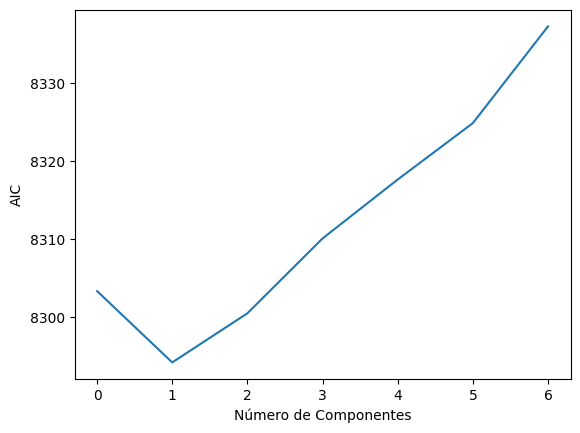

In [19]:
plt_aics = plt.figure()
plt.plot(aics)
plt.xlabel("Número de Componentes")
plt.ylabel("AIC")
plt.show()

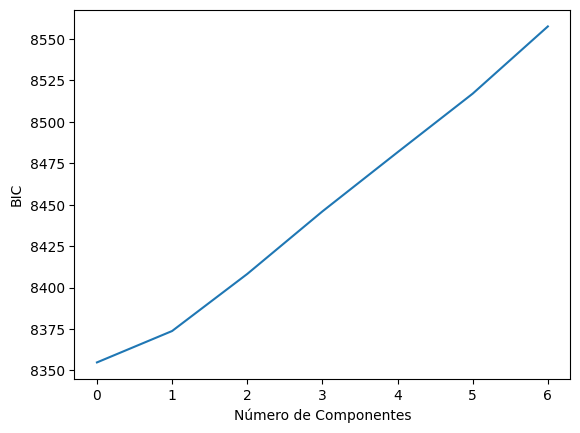

In [20]:
plt_bics = plt.figure()
plt.plot(bics)
plt.xlabel("Número de Componentes")
plt.ylabel("BIC")
plt.show()

## K-means

In [47]:
from sklearn.datasets import make_blobs

nb_samples = 1000
X, y = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5, random_state=1000)

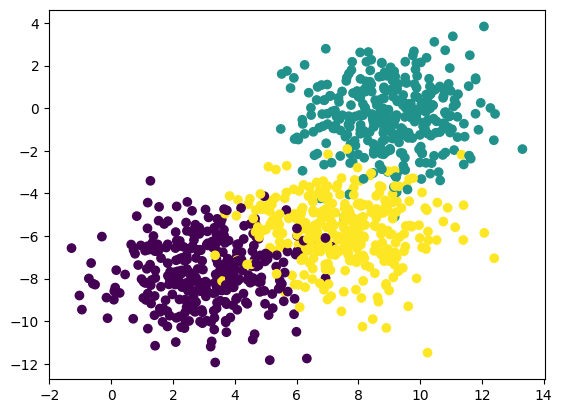

In [59]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

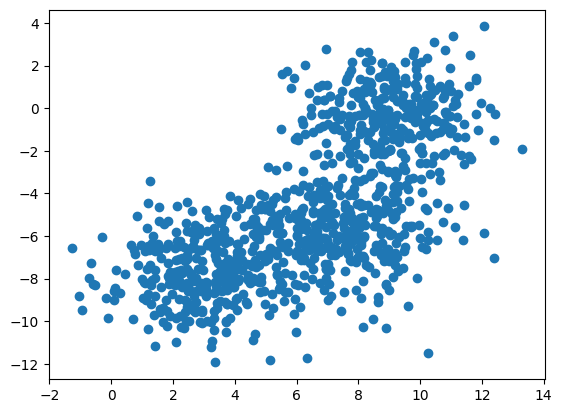

In [29]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [38]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8,init='k-means++')
km.fit(X)

print(km.cluster_centers_)

[[ 8.91336077 -4.80287009]
 [ 2.8372102  -8.85880876]
 [ 8.77728319  1.40878648]
 [ 7.38289758 -7.63743772]
 [10.43677792 -0.65408162]
 [ 5.80202677 -5.3214474 ]
 [ 7.83392273 -0.96395665]
 [ 2.53444033 -6.46251505]]


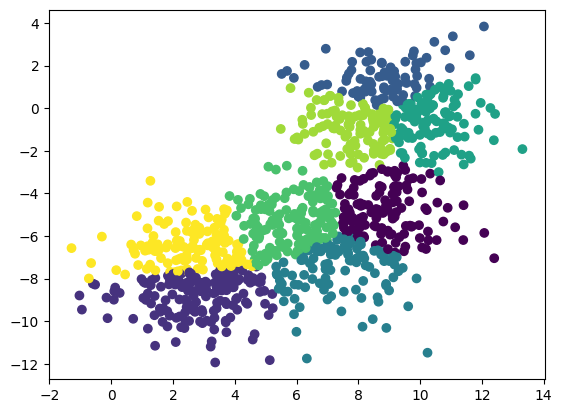

In [39]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))
plt.show()

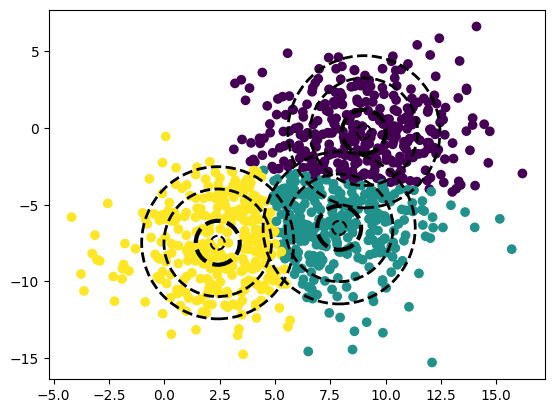

In [5]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=12000, facecolors='none', edgecolors='black', linestyle='--', linewidths=2)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=6000, facecolors='none', edgecolors='black', linestyle='--', linewidths=2)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=1000, facecolors='none', edgecolors='black', linestyle='--', linewidths=3)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, facecolors='none', edgecolors='black', linestyle='--', linewidths=1.5)

plt.show()

In [26]:
from sklearn.datasets import make_circles

nb_samples = 1000
X, Y = make_circles(n_samples=nb_samples, noise=0.05)

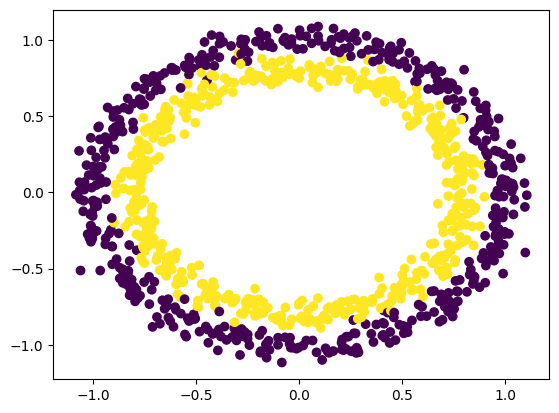

In [27]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=Y)
plt.show()

In [28]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

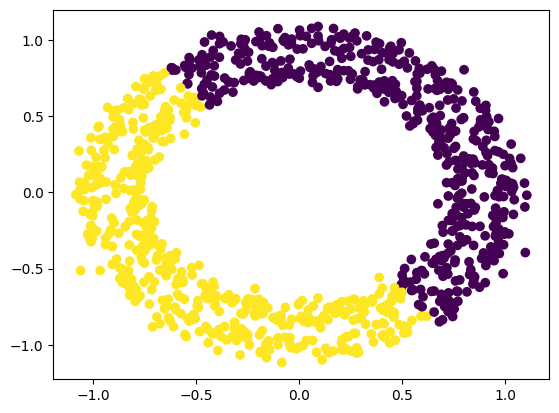

In [29]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))
plt.show()

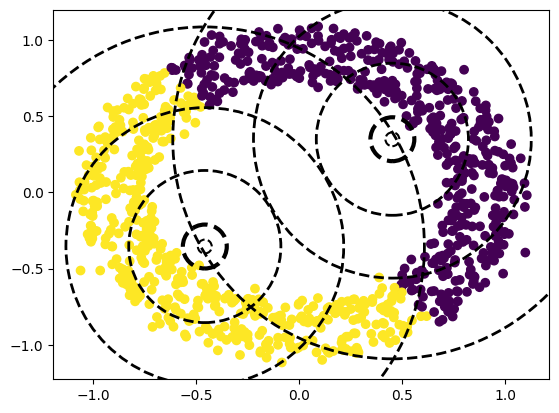

In [30]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=2)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=40000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=2)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=12000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=2)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=1000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=3)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=1.5)


plt.show()

In [31]:
import numpy as np

from scipy.spatial.distance import pdist

true_distances = pdist(X[Y == 0], metric='euclidean')
print(np.mean(true_distances))



Y_pred = km.predict(X)
sampled_X = np.random.choice(X[Y_pred == 0, 0], replace=False, size=300).astype(np.int32)

distances = pdist(X[sampled_X], metric='euclidean')

print(np.mean(distances))


1.2863992382059657
0.10394823305453316


### Otimizando a Inércia

In [32]:
from sklearn.datasets import make_blobs
nb_samples = 1000
X, Y = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5, random_state=1000)

In [16]:
from sklearn.datasets import load_breast_cancer
#data = load_breast_cancer()

#X = data.data
#Y = data.target

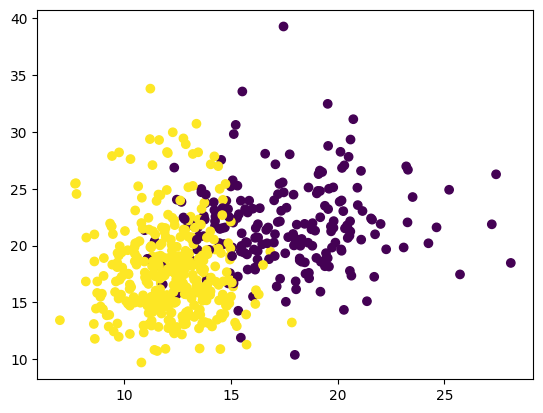

In [18]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=Y)
plt.show()

In [34]:
from sklearn.cluster import KMeans

nb_clusters = [1, 2, 3, 4, 5, 10 , 15, 20]

inertias = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    km.fit(X)
    inertias.append(km.inertia_)

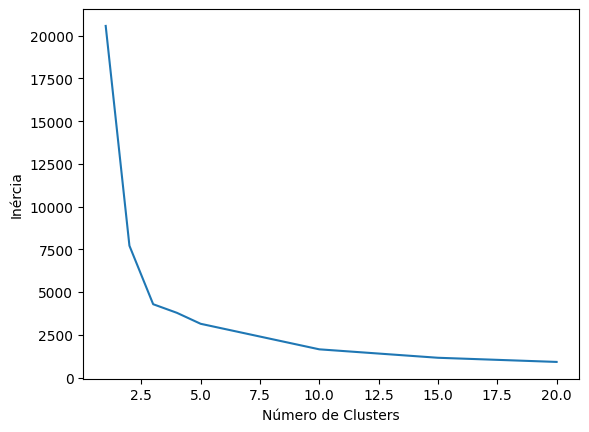

In [35]:
plt_aics = plt.figure()
plt.plot(nb_clusters,inertias)
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

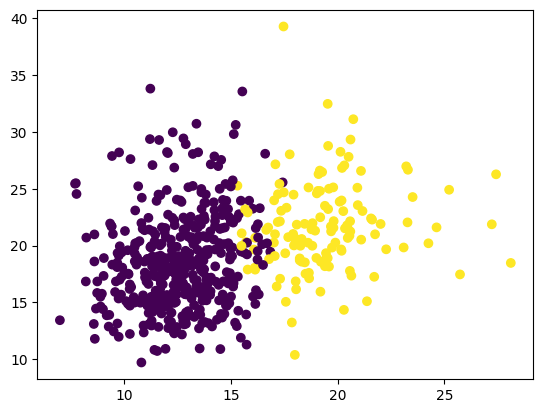

In [21]:
km = KMeans(n_clusters=2)
km.fit(X)

import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))

plt.show()

### Silhouette score

In [70]:
from sklearn.metrics import silhouette_score

nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

avg_silhouettes = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    avg_silhouettes.append(silhouette_score(X, Y))

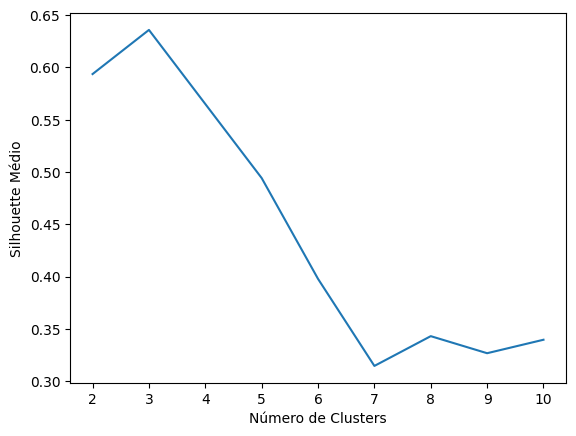

In [71]:
plt_aics = plt.figure()
plt.plot(nb_clusters,avg_silhouettes)
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Médio")
plt.show()

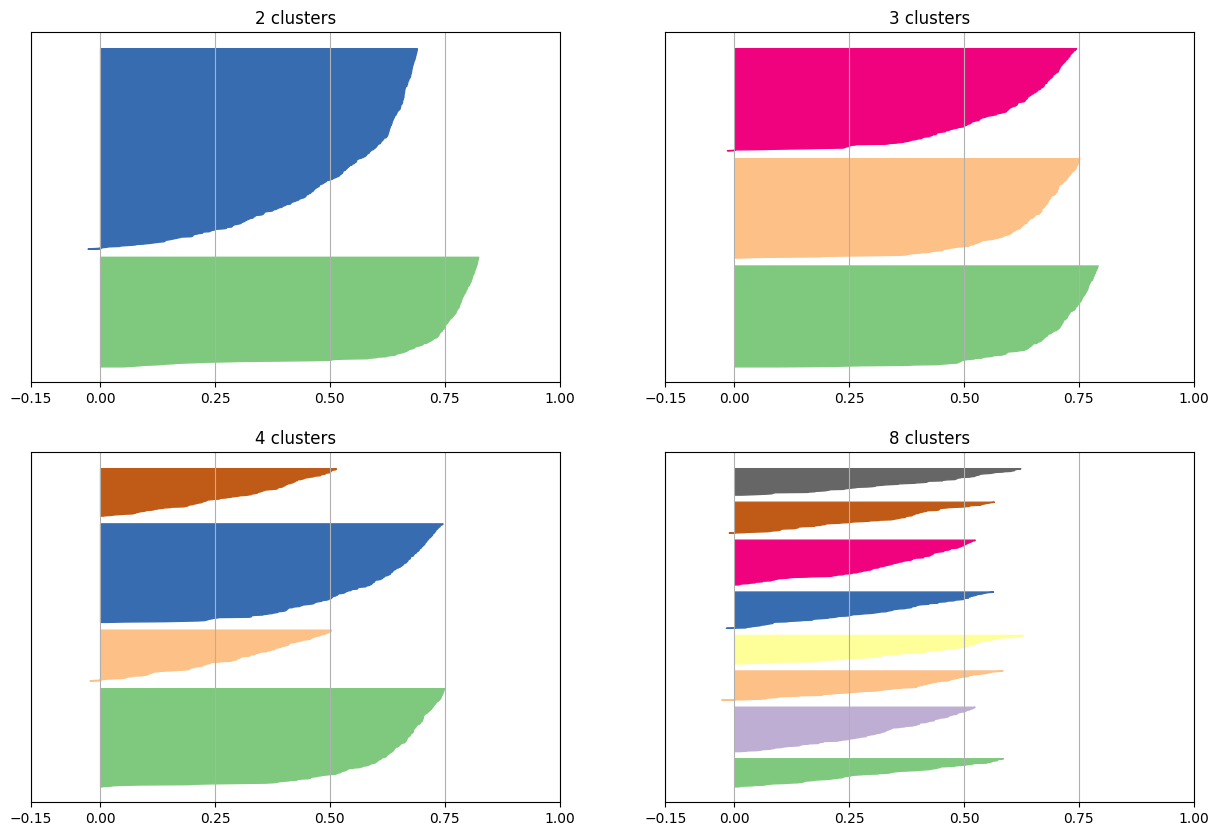

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.metrics import silhouette_samples

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

nb_clusters = [2, 3, 4, 8]
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, n in enumerate(nb_clusters):
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)

    silhouette_values = silhouette_samples(X, Y)
    
    ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' % n)
    ax[mapping[i]].set_xlim([-0.15, 1])
    ax[mapping[i]].grid()
    y_lower = 20

    for t in range(n):
        ct_values = silhouette_values[Y == t]
        ct_values.sort()
        
        y_upper = y_lower + ct_values.shape[0]

        color = cm.Accent(float(t) / n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                     ct_values, facecolor=color, edgecolor=color)
        y_lower = y_upper + 20

### Calinski-Harabasz index

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

ch_scores = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    ch_scores.append(calinski_harabasz_score(X, Y))

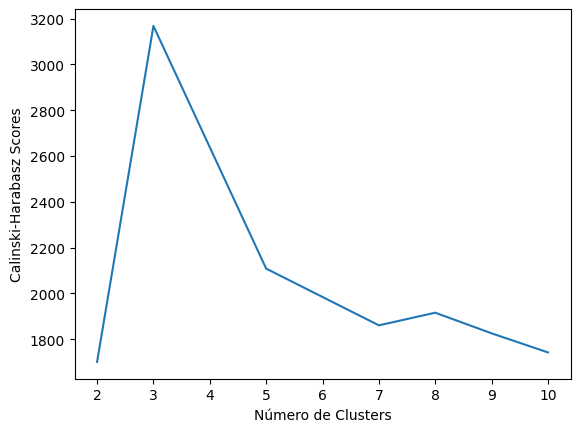

In [74]:
plt_aics = plt.figure()
plt.plot(nb_clusters,ch_scores)
plt.xlabel("Número de Clusters")
plt.ylabel("Calinski-Harabasz Scores")
plt.show()

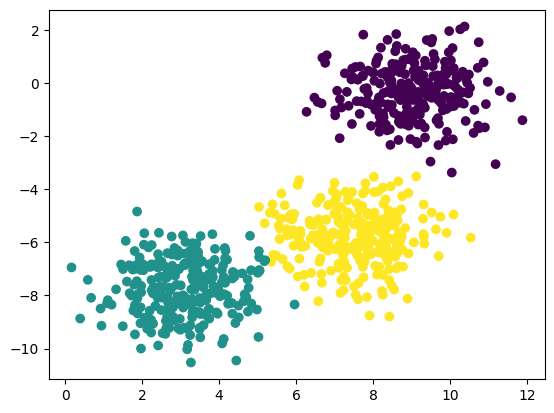

In [76]:
km = KMeans(n_clusters=3)
km.fit(X)

import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))

plt.show()

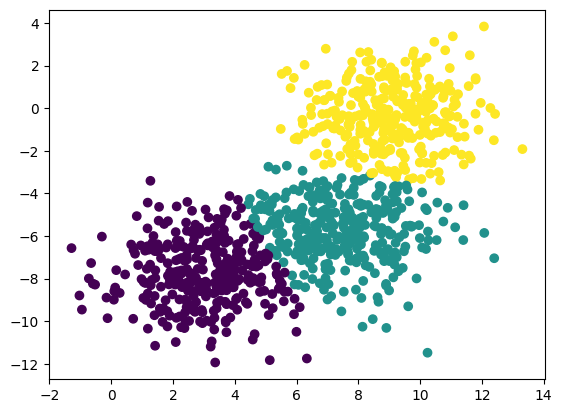

In [44]:
km = KMeans(n_clusters=3)
km.fit(X)

import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))

plt.show()

### Estabilidade de um Cluster

In [83]:
import numpy as np

nb_noisy_datasets = 10

X_noise = []

for _ in range(nb_noisy_datasets):
    Xn = np.ndarray(shape=(1000, 2))
    
    for i, x in enumerate(X):
        if np.random.uniform(0, 1) < 0.25:
            Xn[i] = X[i] + np.random.uniform(-2.0, 2.0)
        else:
            Xn[i] = X[i]

    X_noise.append(Xn)

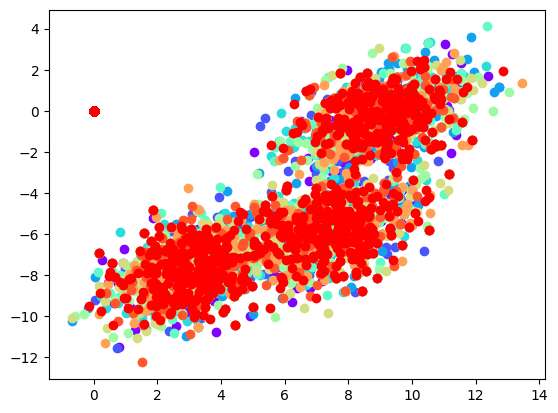

In [84]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.viridis()

colors = iter(cm.rainbow(np.linspace(0, 1, nb_noisy_datasets)))

for i in range(nb_noisy_datasets):
    plt.scatter(X_noise[i][:, 0], X_noise[i][:, 1], color=next(colors))
    
plt.show()

In [85]:
from sklearn.metrics.pairwise import pairwise_distances

nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

instabilities = []

for n in nb_clusters:
    Yn = []
    
    for Xn in X_noise:
        km = KMeans(n_clusters=n)
        Yn.append(km.fit_predict(Xn))

    distances = []

    for i in range(len(Yn)-1):
        for j in range(i, len(Yn)):
            d = pairwise_distances(Yn[i].reshape(-1, 1), Yn[j].reshape(-1, 1), 'hamming')
            distances.append(d[0, 0])
                
    instability = (2.0 * np.sum(distances)) / float(nb_noisy_datasets ** 2)
    instabilities.append(instability)

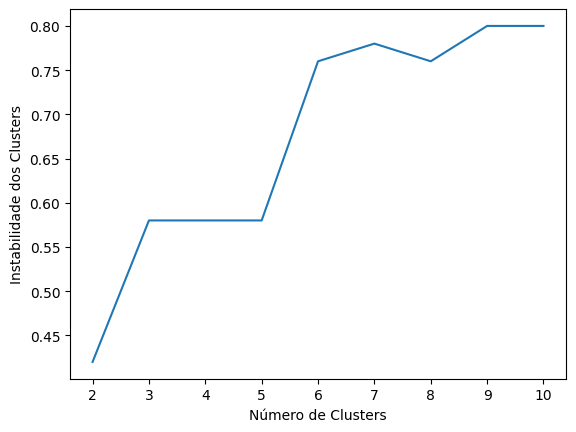

In [86]:
plt_aics = plt.figure()
plt.plot(nb_clusters,instabilities)
plt.xlabel("Número de Clusters")
plt.ylabel("Instabilidade dos Clusters")
plt.show()

### Homogeneidade

In [87]:
from sklearn.metrics import homogeneity_score

km = KMeans(n_clusters=3)
Yp = km.fit_predict(X)

print(homogeneity_score(Y, Yp))

0.4633987413544831


In [88]:
from sklearn.metrics import homogeneity_score

nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

homog_scores = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Yp = km.fit_predict(X)
    homog_scores.append(homogeneity_score(Y, Yp))

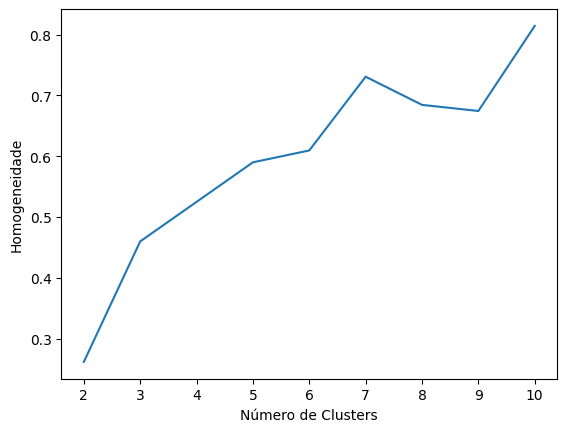

In [89]:
plt_aics = plt.figure()
plt.plot(nb_clusters,homog_scores)
plt.xlabel("Número de Clusters")
plt.ylabel("Homogeneidade")
plt.show()

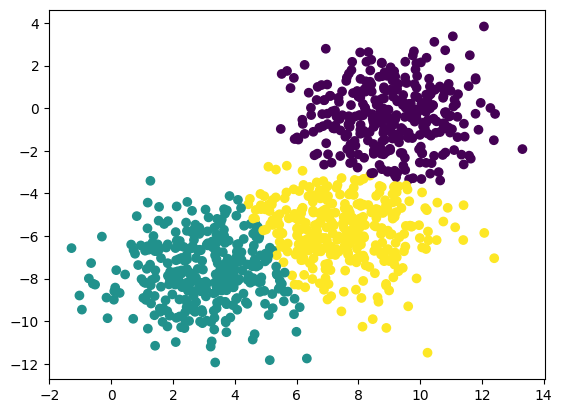

In [61]:
km = KMeans(n_clusters=3)
km.fit(X)

import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))

plt.show()

### Completude

In [90]:
from sklearn.metrics import completeness_score

km = KMeans(n_clusters=2)
Yp = km.fit_predict(X)

print(completeness_score(Y, Yp))

0.9043936439307118


In [91]:
from sklearn.metrics import completeness_score

nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

compl_scores = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Yp = km.fit_predict(X)
    compl_scores.append(completeness_score(Y, Yp))

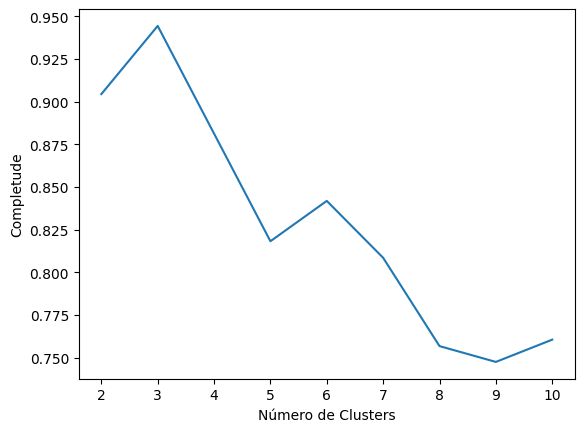

In [92]:
plt_aics = plt.figure()
plt.plot(nb_clusters,compl_scores)
plt.xlabel("Número de Clusters")
plt.ylabel("Completude")
plt.show()

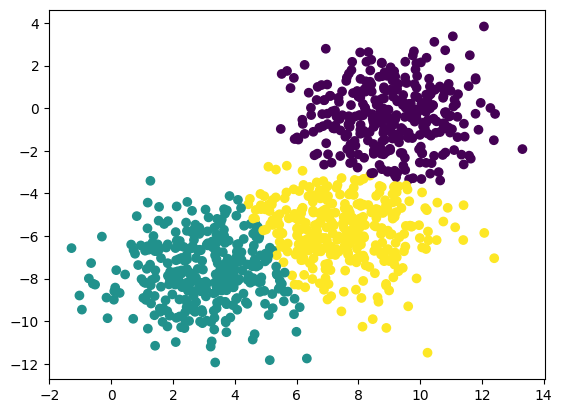

In [56]:
km = KMeans(n_clusters=3)
km.fit(X)

import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))

plt.show()

### Adjusted Rand Index

In [95]:
from sklearn.metrics import adjusted_rand_score

km = KMeans(n_clusters=2)
Yp = km.fit_predict(X)

print(adjusted_rand_score(Y, Yp))

0.1751999832901368


In [96]:
from sklearn.metrics import completeness_score

nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

ra_scores = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Yp = km.fit_predict(X)
    ra_scores.append(adjusted_rand_score(Y, Yp))

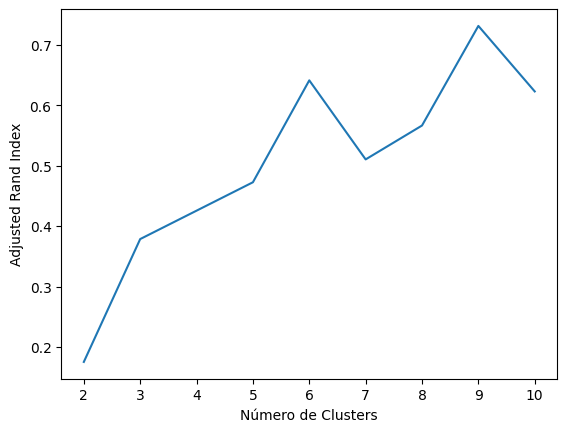

In [97]:
plt_aics = plt.figure()
plt.plot(nb_clusters,ra_scores)
plt.xlabel("Número de Clusters")
plt.ylabel("Adjusted Rand Index")
plt.show()

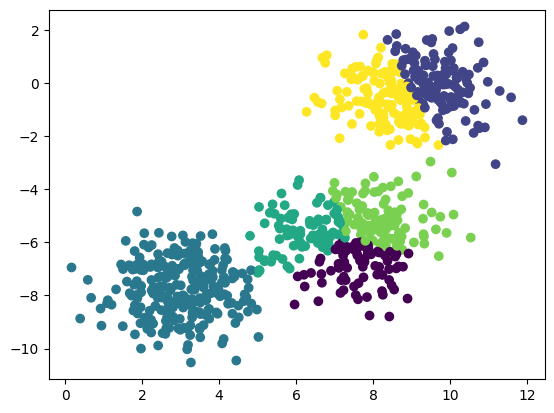

In [100]:
km = KMeans(n_clusters=6)
km.fit(X)

import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))

plt.show()